In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import os


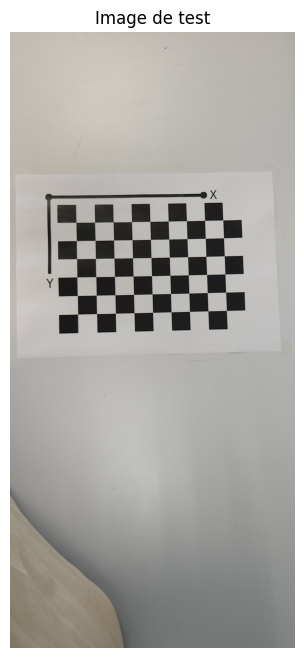

In [ ]:

images_path = 'images_calibration/*.jpg'  # Ajuste l'extension si nécessaire (.png, .jpeg, etc.)

# Lire toutes les images
images = glob.glob(images_path)




img_test = cv2.imread(images[5])
img_test_rgb = cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 8))
plt.imshow(img_test_rgb)
plt.title("Image de test")
plt.axis('off')
plt.show()


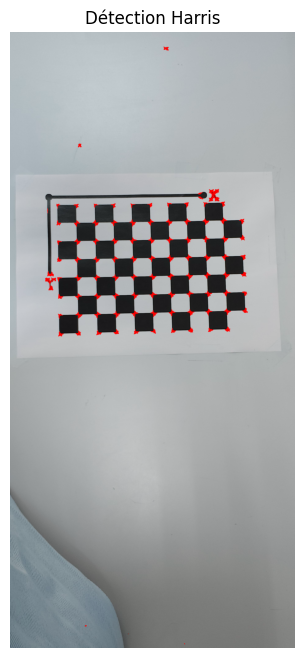

In [23]:

img = img_test_rgb
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

# Détection Harris
harris = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)

# Dilatation pour marquer les coins
harris = cv2.dilate(harris, None)

# Marquer les coins en rouge (seuil à 0.05 * max)
img[harris > 0.05 * harris.max()] = [0, 0, 255]

# Afficher
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Détection Harris")
plt.axis('off')
plt.show()

In [18]:
CHECKERBOARD = (10, 7)  # Nombre de coins intérieurs (colonnes, lignes)

gray = cv2.cvtColor(img_test_rgb, cv2.COLOR_BGR2GRAY)

ret, corners = cv2.findChessboardCorners(gray , CHECKERBOARD, None)

if ret:
    print("✓ Coins détectés!")
    
    # Affiner la position des coins
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
    corners_refined = cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)
    
    # Dessiner les coins sur l'image
    img_with_corners = cv2.drawChessboardCorners(img_test_rgb.copy(), CHECKERBOARD, corners_refined, ret)
    
    # Afficher l'image avec les coins
    plt.figure(figsize=(10, 8))
    plt.imshow(cv2.cvtColor(img_with_corners, cv2.COLOR_BGR2RGB))
    plt.title("Coins détectés et affinés")
    plt.axis('off')
    plt.show()
    
    print(f"Nombre de coins détectés : {len(corners_refined)}")

else:
    print(" Aucun coin détecté.")

 Aucun coin détecté.
